# 006_00m

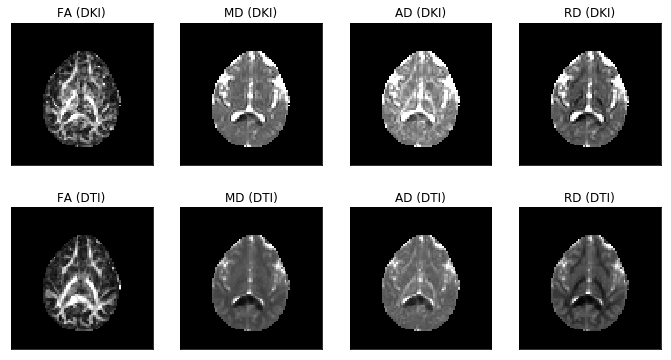

In [74]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu
from dipy.core.gradients import gradient_table
from dipy.io import read_bvals_bvecs

fdwi = "./aTBIp2_006_00m_DKI/aTBIp2_006_00m_3shell.nii.gz"
fbval = "./aTBIp2_006_00m_DKI/aTBIp2_006_00m_3shell.bval"
fbvec = "./aTBIp2_006_00m_DKI/aTBIp2_006_00m_3shell.bvec"

img = nib.load(fdwi)
data = img.get_data()
affine = img.affine

maskdata, mask = median_otsu(data, 4, 2, False, vol_idx=[0, 1], dilate=1)

bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

include = np.ones(99)
include[33] = 0;
include[66] = 0;
bvals = bvals[include>0.1]
bvecs = bvecs[include>0.1]
data = data[:, :, :, include>0.1]

gtab = gradient_table(bvals, bvecs)

dkimodel = dki.DiffusionKurtosisModel(gtab)

dkifit = dkimodel.fit(data, mask=mask)

FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

axial_slice = 18

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')

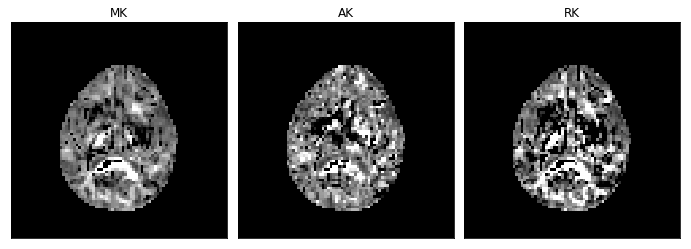

In [75]:
MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)

fig2, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MK')
ax.flat[1].imshow(AK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[1].set_title('AK')
ax.flat[2].imshow(RK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('RK')

plt.show()
fig2.savefig('Kurtosis_tensor_standard_measures.png')

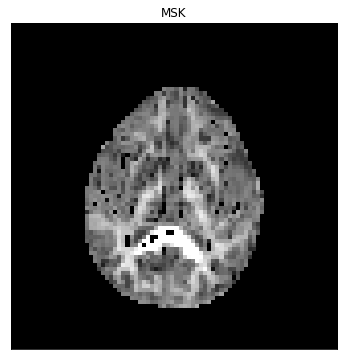

In [76]:
import dipy.reconst.msdki as msdki
msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(data, mask=mask)
MSK = msdki_fit.msk

fig2, ax = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig2.subplots_adjust(hspace=0.3, wspace=0.05)
ax.imshow(MSK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.set_title('MSK')
plt.show()

# 006_001m

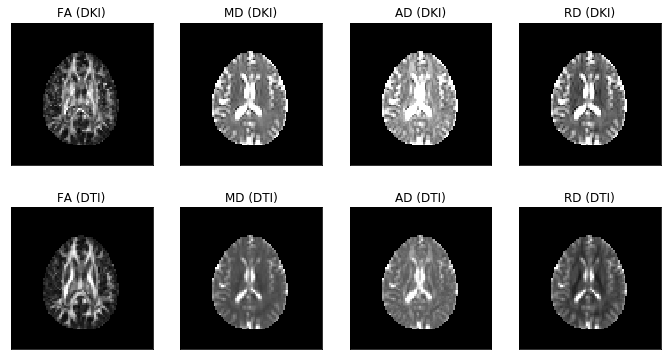

In [77]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu
from dipy.core.gradients import gradient_table
from dipy.io import read_bvals_bvecs

fdwi = "./aTBIp2_006_01m_DKI/aTBIp2_006_01m_3shell.nii.gz"
fbval = "./aTBIp2_006_01m_DKI/aTBIp2_006_01m_3shell.bval"
fbvec = "./aTBIp2_006_01m_DKI/aTBIp2_006_01m_3shell.bvec"

img = nib.load(fdwi)
data = img.get_data()
affine = img.affine

maskdata, mask = median_otsu(data, 4, 2, False, vol_idx=[0, 1], dilate=1)

bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

include = np.ones(99)
include[33] = 0;
include[66] = 0;
bvals = bvals[include>0.1]
bvecs = bvecs[include>0.1]
data = data[:, :, :, include>0.1]

gtab = gradient_table(bvals, bvecs)

dkimodel = dki.DiffusionKurtosisModel(gtab)

dkifit = dkimodel.fit(data, mask=mask)

FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

axial_slice = 18

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')

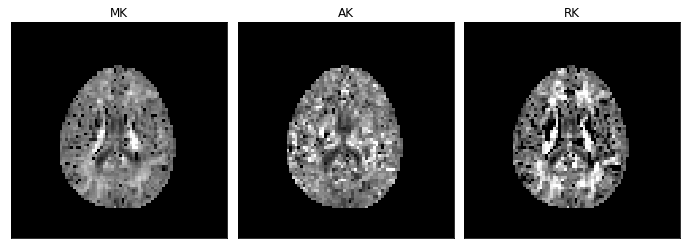

In [78]:
MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)

fig2, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MK')
ax.flat[1].imshow(AK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[1].set_title('AK')
ax.flat[2].imshow(RK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('RK')

plt.show()
fig2.savefig('Kurtosis_tensor_standard_measures.png')

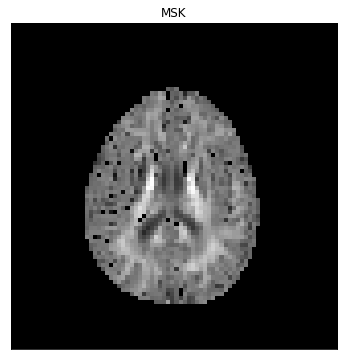

In [79]:
import dipy.reconst.msdki as msdki
msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(data, mask=mask)
MSK = msdki_fit.msk

fig2, ax = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig2.subplots_adjust(hspace=0.3, wspace=0.05)
ax.imshow(MSK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.set_title('MSK')
plt.show()

# 008_06m

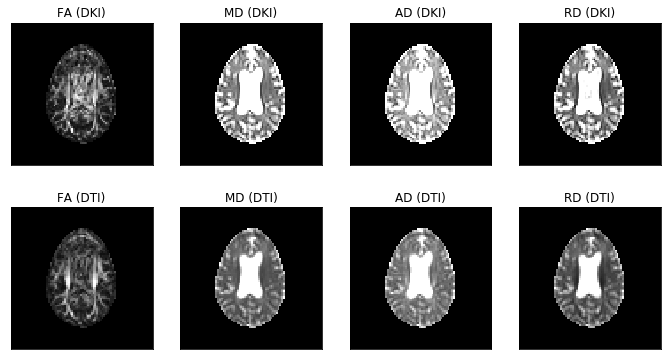

In [80]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu
from dipy.core.gradients import gradient_table
from dipy.io import read_bvals_bvecs

fdwi = "./aTBIp2_008_06m_DKI/aTBIp2_008_06m_3shell.nii.gz"
fbval = "./aTBIp2_008_06m_DKI/aTBIp2_008_06m_3shell.bval"
fbvec = "./aTBIp2_008_06m_DKI/aTBIp2_008_06m_3shell.bvec"

img = nib.load(fdwi)
data = img.get_data()
affine = img.affine

maskdata, mask = median_otsu(data, 4, 2, False, vol_idx=[0, 1], dilate=1)

bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

include = np.ones(99)
include[33] = 0;
include[66] = 0;
bvals = bvals[include>0.1]
bvecs = bvecs[include>0.1]
data = data[:, :, :, include>0.1]

gtab = gradient_table(bvals, bvecs)

dkimodel = dki.DiffusionKurtosisModel(gtab)

dkifit = dkimodel.fit(data, mask=mask)

FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

axial_slice = 18

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')

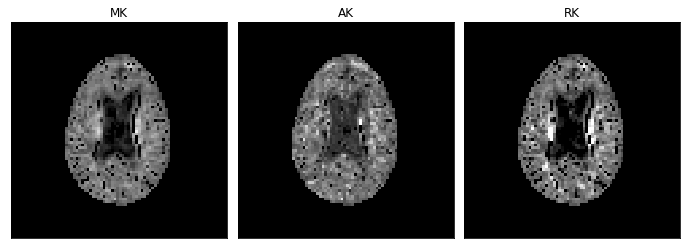

In [81]:
MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)

fig2, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MK')
ax.flat[1].imshow(AK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[1].set_title('AK')
ax.flat[2].imshow(RK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('RK')

plt.show()
fig2.savefig('Kurtosis_tensor_standard_measures.png')

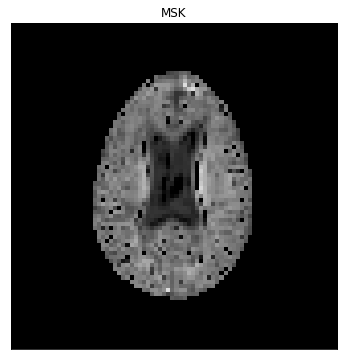

In [82]:
import dipy.reconst.msdki as msdki
msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(data, mask=mask)
MSK = msdki_fit.msk

fig2, ax = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig2.subplots_adjust(hspace=0.3, wspace=0.05)
ax.imshow(MSK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.set_title('MSK')
plt.show()

# 008_00m

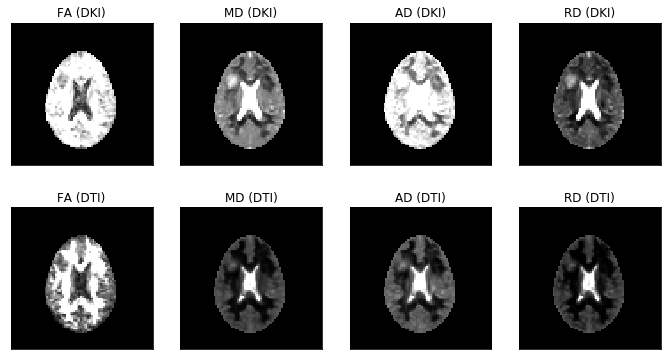

In [83]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu
from dipy.core.gradients import gradient_table
from dipy.io import read_bvals_bvecs

fdwi = "./aTBIp2_008_00m_DKI/aTBIp2_008_00m_3shell.nii.gz"
fbval = "./aTBIp2_008_00m_DKI/aTBIp2_008_00m_3shell.bval"
fbvec = "./aTBIp2_008_00m_DKI/aTBIp2_008_00m_3shell.bvec"

img = nib.load(fdwi)
data = img.get_data()
affine = img.affine

maskdata, mask = median_otsu(data, 4, 2, False, vol_idx=[0, 1], dilate=1)

bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

include = np.ones(99)
include[33] = 0;
include[66] = 0;
bvals = bvals[include>0.1]
bvecs = bvecs[include>0.1]
data = data[:, :, :, :]

gtab = gradient_table(bvals, bvecs)

dkimodel = dki.DiffusionKurtosisModel(gtab)

dkifit = dkimodel.fit(data, mask=mask)

FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

axial_slice = 18

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray', vmin=0,
                  vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')

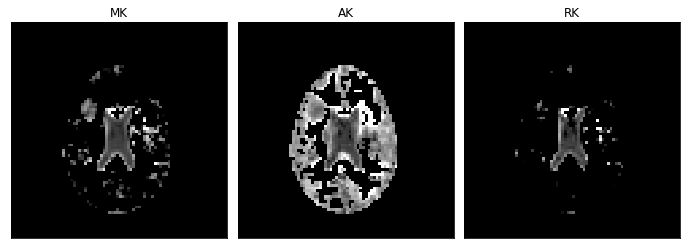

In [84]:
MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)

fig2, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MK')
ax.flat[1].imshow(AK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[1].set_title('AK')
ax.flat[2].imshow(RK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('RK')

plt.show()
fig2.savefig('Kurtosis_tensor_standard_measures.png')

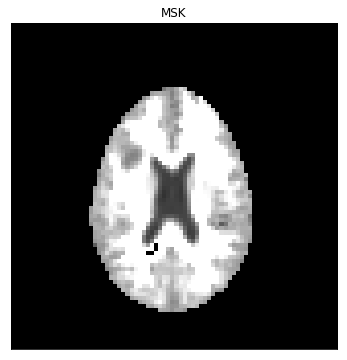

In [85]:
import dipy.reconst.msdki as msdki
msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(data, mask=mask)
MSK = msdki_fit.msk

fig2, ax = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig2.subplots_adjust(hspace=0.3, wspace=0.05)
ax.imshow(MSK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.set_title('MSK')
plt.show()